In [1]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establish connection to the database
db_connection = mysql.connector.connect(
    host="localhost",  # Replace with your host
    user="root",       # Replace with your MySQL username
    password="Chinnu@262",  # Replace with your MySQL password
    database="NR"         # Name of your database
)

cursor = db_connection.cursor()


In [5]:
# Query 1: Orders by Customer
query1 = """
    SELECT C.CustomerName, COUNT(P.OrderID) AS OrderCount
    FROM Customer C
    JOIN Places P ON C.CustomerID = P.CustomerID
    GROUP BY C.CustomerID;
"""
cursor.execute(query1)
customer_orders = pd.DataFrame(cursor.fetchall(), columns=['CustomerName', 'OrderCount'])

# Query 2: Product Quantity in Warehouses
query2 = """
    SELECT W.WarehouseLocation, COUNT(P.ProductID) AS ProductCount
    FROM Warehouse W
    JOIN Products P ON W.WarehouseID = P.WarehouseID
    GROUP BY W.WarehouseID;
"""
cursor.execute(query2)
warehouse_products = pd.DataFrame(cursor.fetchall(), columns=['WarehouseLocation', 'ProductCount'])

# Query 3: Payment Types Usage
query3 = """
    SELECT PaymentType, COUNT(*) AS UsageCount
    FROM Payment
    GROUP BY PaymentType;
"""
cursor.execute(query3)
payment_types = pd.DataFrame(cursor.fetchall(), columns=['PaymentType', 'UsageCount'])


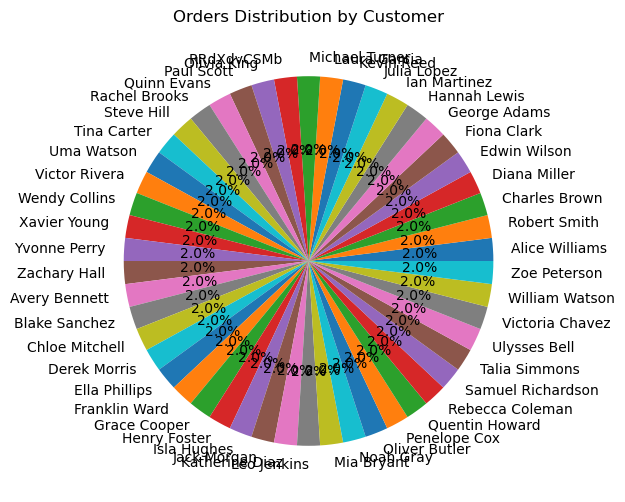

/var/folders/dk/ty44k4f97tl78kr03dymv92c0000gn/T/ipykernel_17838/1063677486.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WarehouseLocation', y='ProductCount', data=warehouse_products, palette='viridis')


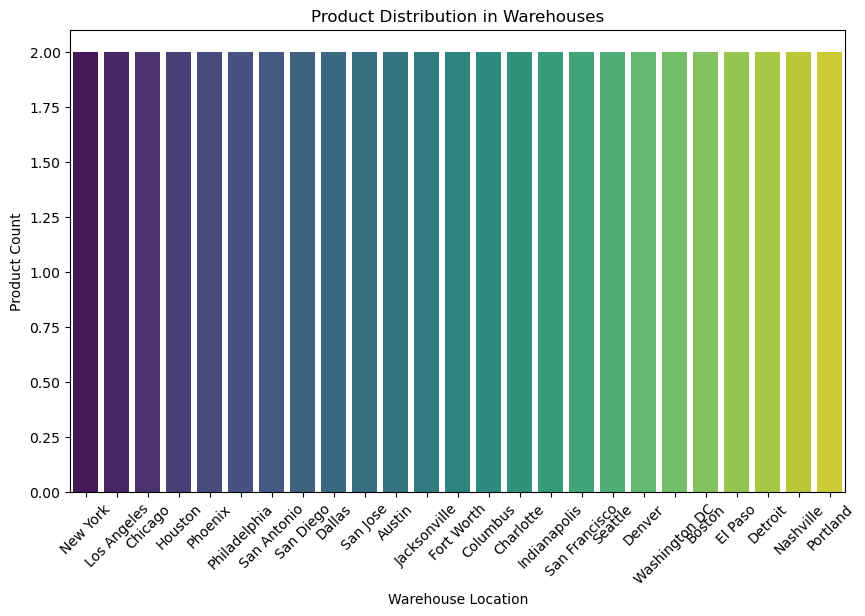

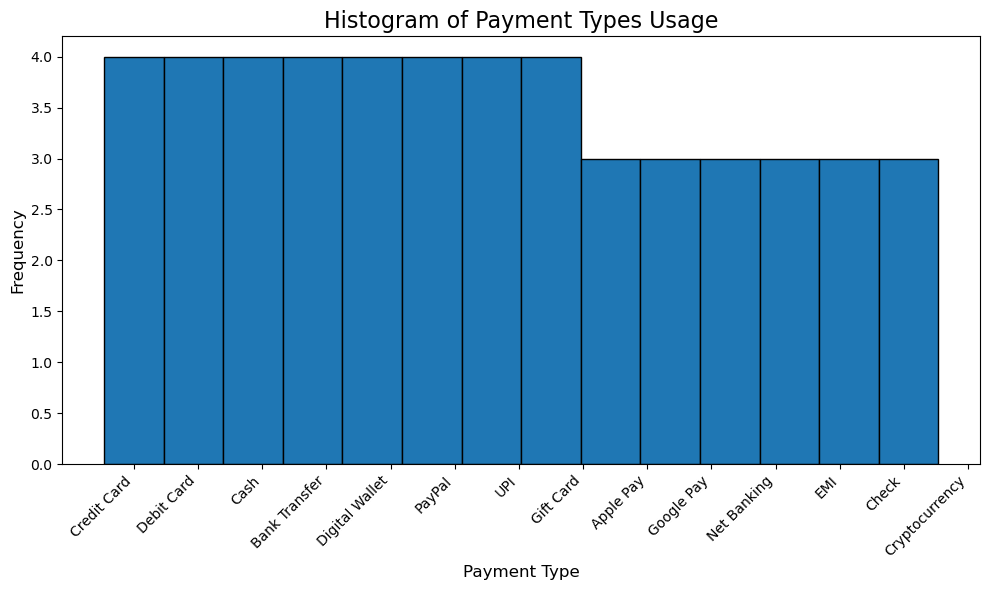

In [7]:
# Visualization 1: Pie Chart for Orders by Customer
plt.figure(figsize=(8, 6))
plt.pie(customer_orders['OrderCount'], labels=customer_orders['CustomerName'], autopct='%1.1f%%')
plt.title('Orders Distribution by Customer')
plt.show()

# Visualization 2: Bar Chart for Products in Warehouses
plt.figure(figsize=(10, 6))
sns.barplot(x='WarehouseLocation', y='ProductCount', data=warehouse_products, palette='viridis')
plt.xticks(rotation=45)
plt.title('Product Distribution in Warehouses')
plt.ylabel('Product Count')
plt.xlabel('Warehouse Location')
plt.show()

# Assuming you have a DataFrame called 'payment_types' with columns 'PaymentType' and 'UsageCount'

plt.figure(figsize=(10, 6))

# Convert UsageCount to a list of individual occurrences
usage_data = []
for payment_type, count in zip(payment_types['PaymentType'], payment_types['UsageCount']):
    usage_data.extend([payment_type] * count)

# Create the histogram
plt.hist(usage_data, bins=len(payment_types), edgecolor='black', align='left')

plt.title('Histogram of Payment Types Usage', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(len(payment_types)), payment_types['PaymentType'], rotation=45, ha='right')
plt.tight_layout()
plt.show()